# 泰坦尼克名单分析

## 1.观察数据

import 库

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib inline

读取csv数据，并观察部分数据，提出问题

In [2]:
df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.提出问题

什么因素影响了船员的生存？

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.分析问题

从info中看出，一共有891条数据，Age信息有缺失行，Cabin信息只有204个，Ticket信息看不出规律，这些内容参考意义不大。

把Cabin，Ticket列去除，Age无效的行去除

In [5]:
df = df.drop(['Ticket','Cabin'], axis=1)
df = df.dropna()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


从这些数据中，我们猜测 *性别,船舱等级,年龄* 可能会对成员存活情况相关联。

### 首先对性别进行分析

([<matplotlib.patches.Wedge at 0x7f46e4782c90>,
  <matplotlib.text.Text at 0x7f46e47a5490>])

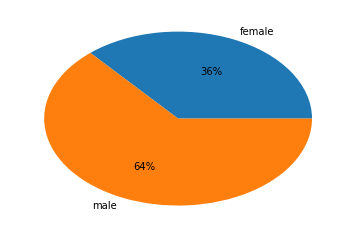

In [6]:
# single value status
by_sex = df.groupby('Sex', as_index = False)['Survived'].count()
plt.pie(by_sex['Survived'], labels = by_sex['Sex'], autopct='%.0f%%')

从饼图中，可以看出男女性别分部分别为64%和36%

接下来我们将性别和存货情况联系起来

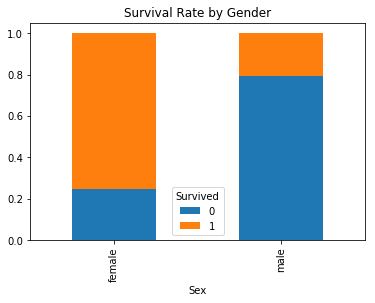

In [7]:
# cross sex and survived status
sex_val_xt = pd.crosstab(df['Sex'], df['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

从图表中看出，大部分女性存活了，而男性则正好相反，存活率只有0.2左右。

接下来，从资料中我们发现Pclass这个变量代表了船舱的级别，猜测不同身份的人可能存活情况也会有明显区别，所以加上对Pclass的研究

首先，查看Pclass的分布情况

([<matplotlib.patches.Wedge at 0x7f46e45d71d0>,
  <matplotlib.text.Text at 0x7f46e45f1750>])

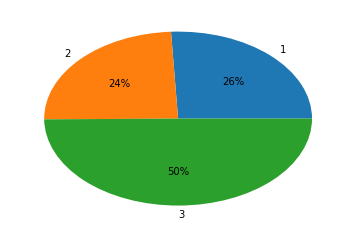

In [8]:
# single value status
by_sex = df.groupby('Pclass', as_index = False)['Survived'].count()
plt.pie(by_sex['Survived'], labels = by_sex['Pclass'], autopct='%.0f%%')

从饼图中看出，3级客仓占了总数的一半，2级为24%，1级为26%

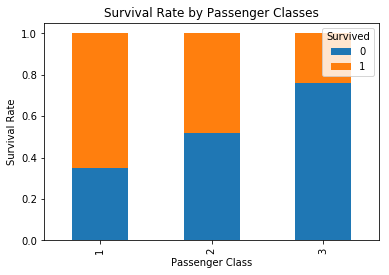

In [9]:
#cross pclass and survived status
pclass_xt = pd.crosstab(df['Pclass'], df['Survived'])
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

从图中看出，1级客仓存货率最大，2级客存活率约为一半，3级存活率低

最后我们综合考虑，Pcalss，Sex与存活情况的关系

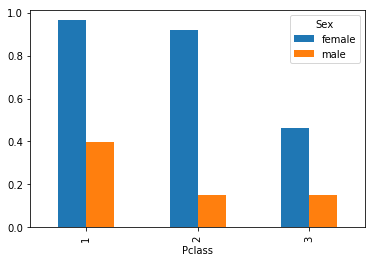

In [10]:
# Plot survival rate by Sex and Pclass
by_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
by_class_sex.unstack().plot(kind = 'bar')

从最终的图中可以看出，一级和二级客仓中女性的存活率接近1,也就是基本存货，1级客仓中的男性也有较大比率存货。而2,3级客仓男性存活率都接近0.1,3级客仓的女性存货率相对1,2级的女性较低，但还是超过了各阶层的男性。

接下来我们再考虑年龄和存活情况的关系，首先依然是年龄的分布情况

(array([  54.,   46.,  177.,  169.,  117.,   70.,   45.,   23.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

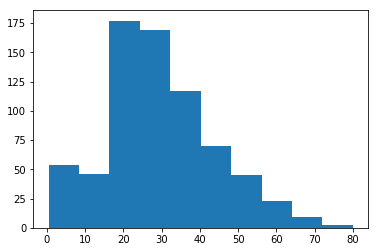

In [11]:
plt.hist(df['Age'])

乘客集中在20岁到40岁的区域， 在看看年龄和存活情况的关系

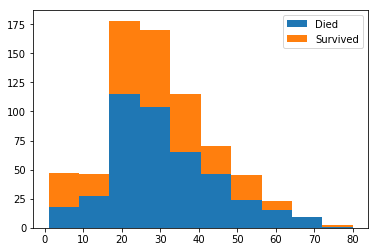

In [12]:
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']
max_age = max(df['Age'])
plt.hist([df1, df2], 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'))

图中看出信息不是太多，只能看出年龄大于20且小于40时，存活的人数较多但还是小于死亡的人数。只有年龄小于10岁时，存活人数大于了死亡人数。

为了更直观的看出存活率，于是我们再完成如下图表，直接显示存活率

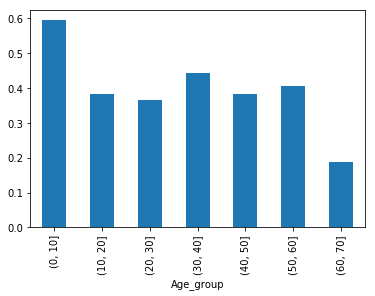

In [14]:
bins = np.arange(0, 80, 10)
df['Age_group'] = pd.cut(df['Age'], bins)
by_Age = df.groupby('Age_group')['Survived'].mean()

by_Age.plot(kind = 'bar')

从上图中，更加直观的体现了前面我们所说的，10岁以下存活率最高。

## 结论

在结论前，需要重申整个分析过程前面的数据处理和选择过程：

1.由于Age是我们要使用的变量，且有效行数为714行，所以我们将Age为Nan的所在行删除了，数据从891个减少到了714个。所以最终产生的分析结果可能产生误差。

2.这里我们选择了3个变量寻找相关性并且综合考虑了性别和客舱等级，但只单独分析了年龄。

总之，通过以上的几个变量的分析，我们可以判断女性，高等级客舱的乘客和年龄层次小于10岁的有很大存活率。如果即是女性又是1,2级客舱的基本能够存活。